<a href="https://colab.research.google.com/github/rafflds/Diagnostico_Cancer/blob/main/Diagnostico_de_C%C3%A2ncer_(RandomForestClassifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color=teal>Análise Exploratória

> Técnica de examinar e estudar as características de um conjunto de dados antes de que ele seja submetido a uma aplicação, seja exclusivamente de negócio, estatística ou de aprendizagem de máquina.

**Imports bibliotecas**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

**Leitura da base de dados**

In [4]:
dados = pd.read_csv('exames.csv')
dados.head()

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32,exame_33
0,842302,M,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,...,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,...,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,...,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,...,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,...,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678,0.854454


In [5]:
dados.size

19915

**Informações Gerais**

> Informações sobre valores nulls, tipo de variáveis e quantidade de colunas

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           569 non-null    int64  
 1   diagnostico  569 non-null    object 
 2   exame_1      569 non-null    float64
 3   exame_2      569 non-null    float64
 4   exame_3      569 non-null    float64
 5   exame_4      569 non-null    float64
 6   exame_5      569 non-null    float64
 7   exame_6      569 non-null    float64
 8   exame_7      569 non-null    float64
 9   exame_8      569 non-null    float64
 10  exame_9      569 non-null    float64
 11  exame_10     569 non-null    float64
 12  exame_11     569 non-null    float64
 13  exame_12     569 non-null    float64
 14  exame_13     569 non-null    float64
 15  exame_14     569 non-null    float64
 16  exame_15     569 non-null    float64
 17  exame_16     569 non-null    float64
 18  exame_17     569 non-null    float64
 19  exame_18

In [7]:
print('Dados existentes na variável exame 33: %.2f%%' %(150/569 * 100))
print('Dados Faltantes na variável exame 33: ', (569 - 150))

Dados existentes na variável exame 33: 26.36%
Dados Faltantes na variável exame 33:  419


**Tratar valores faltantes**

In [8]:
dados.isnull().sum()

id               0
diagnostico      0
exame_1          0
exame_2          0
exame_3          0
exame_4          0
exame_5          0
exame_6          0
exame_7          0
exame_8          0
exame_9          0
exame_10         0
exame_11         0
exame_12         0
exame_13         0
exame_14         0
exame_15         0
exame_16         0
exame_17         0
exame_18         0
exame_19         0
exame_20         0
exame_21         0
exame_22         0
exame_23         0
exame_24         0
exame_25         0
exame_26         0
exame_27         0
exame_28         0
exame_29         0
exame_30         0
exame_31         0
exame_32         0
exame_33       419
dtype: int64

**Variável está faltando 74% dos dados, melhor apagar está variável**

In [9]:
dados = dados.drop(columns = ['exame_33'])
dados.head(2)

,id,diagnostico,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,842302,M,17.99,10.38,122.8,103.78,1001.0,0.11840,0.27760,0.3001,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.9,103.78,1326.0,0.08474,0.07864,0.0869,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902


**Existem 2 registros na variávels diagnóstico**
* M = Câncer Maligno
* B = Câncer Benigno

In [10]:
dados.diagnostico.unique()

array(['M', 'B'], dtype=object)

**Existe mais diagnóstico de Câncer Benigno**

In [11]:
dados.diagnostico.value_counts()

B    357
M    212
Name: diagnostico, dtype: int64

**Análisar Estatística do Dataset**

In [12]:
dados.describe()

,id,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
count,5.690000e+02,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,5.690000e+02,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,1.037800e+02,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,7.860000e-01,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,1.422336e-14,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,1.111200e-16,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,1.037800e+02,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,7.860000e-01,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,1.037800e+02,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,7.860000e-01,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,1.037800e+02,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,7.860000e-01,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,1.037800e+02,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,7.860000e-01,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,1.037800e+02,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,7.860000e-01,0.291000,0.663800,0.207500


# <font color=navy>Pré-Processamento

> É uma etapa fundamental que pode melhorar a performance dos algoritmos de análise, através da redução de dimensionalidade. 

In [13]:
from sklearn.model_selection import train_test_split
from numpy import random

SEED = 123
random.seed(SEED)

exames = dados.drop(columns=["id", "diagnostico"], axis=1)
diagnostico = dados.diagnostico

treino_x, teste_x, treino_y, teste_y = train_test_split(exames, diagnostico, 
                                                        test_size=0.25)

# <font color=green>Machine Learning

In [14]:
from sklearn.ensemble import RandomForestClassifier

classificador = RandomForestClassifier(n_estimators = 100)
classificador.fit(treino_x, treino_y)
print('Classificação: %.2f%%'%(classificador.score(teste_x, teste_y)))

Classificação: 0.99%


# <font color=purple>SelectKbest

> Escolher as melhores Features para usar no modelo de Machine Learning

> Obs: não aceita valores negativos

In [15]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

selectK = SelectKBest(chi2, k=5)
selectK

SelectKBest(k=5, score_func=<function chi2 at 0x7ff3b5620670>)

## <font color=navy>Pré-Processamento

In [16]:
SEED = 123
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(exames, diagnostico, 
                                                        test_size=0.25)


selectK.fit(treino_x, treino_y)
treino_K = selectK.transform(treino_x)
teste_K = selectK.transform(teste_x)

**O modelo escolheu 5 Features**

In [17]:
teste_K.shape

(143, 5)

## <font color=green>Machine Learning

**Baixou um pouco o score, porém diminuiu 85% do dataset**

In [18]:
classificador2 = RandomForestClassifier(n_estimators = 100, random_state=1234)
classificador2.fit(treino_K, treino_y)
print('Classificação: %.2f%%' %(classificador2.score(teste_K, teste_y)))

Classificação: 0.96%


In [19]:
print('Porcentagem de features existentes no Dataset: %.1f%%' %(5/33 *100))

Porcentagem de features existentes no Dataset: 15.2%


## <font color=gray>**Matriz de Confusão**

**Resumo:**
* **0 = Câncer Benigno:** 89 casos (reais)
* **0 = Predição da máquina:** 93 casos (Câncer Benigno), porém 5 desses casos eram Câncer Maligno, ocorreu um erro de diagnóstico nesses 5 casos.

* **1 = Câncer Maligno:** 54 casos (reais)
* **1 = Predição da máquina:** 50 casos (Câncer Maligno), porém 1 desses casos eram Câncer Benigno, ocorreu um erro de diagnóstico nesses 1 casos.

[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

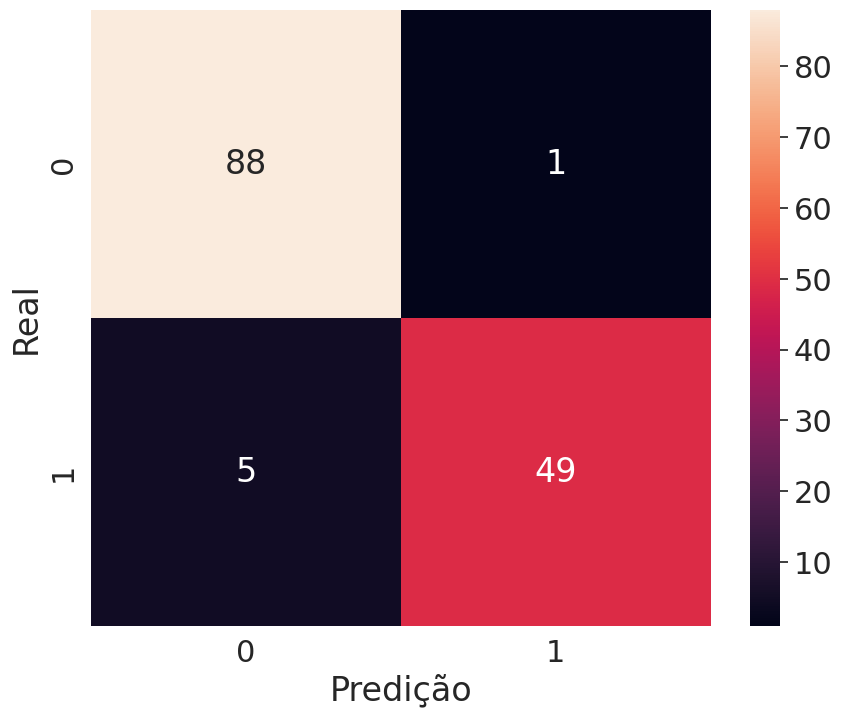

In [20]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador2.predict(teste_K))
matriz_confusao

# Gráfico
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")

# <font color=brow>StandardScaler

> Pega cada um dos valores da tabela, subtrair da média da variável e dividir pelo desvio padrão, padronizar os dados colocando-os na mesma escala.

> OBS: Usar dataset antes do método **SelectKbest**, para via de comparação de resultados

In [21]:
from sklearn.preprocessing import StandardScaler

# Método 
scaler = StandardScaler()
scaler.fit(exames)
exames_scaler = scaler.transform(exames)

# Transforma em Dataframe
exames_scaler = pd.DataFrame(data = exames_scaler, columns=exames.columns)

## Dashboard

**Plotar em gráfico a parcela de exames Benignos e Malignos, por variável**

In [22]:
# Criar um função para diminuir a quantidade de repetições de código
def grafico_violino(dataset, inicio, fim):   
   
    plot = pd.concat([diagnostico, exames_scaler.iloc[:,inicio:fim]], axis = 1)
    plot = pd.melt(plot, id_vars="diagnostico", 
                    var_name="exames",
                    value_name="valores")

    plt.figure(figsize=(10,10))

    sns.violinplot(x = "exames", y = "valores", 
                  hue = "diagnostico", data = plot, split=True)

    plt.xticks(rotation = 90)

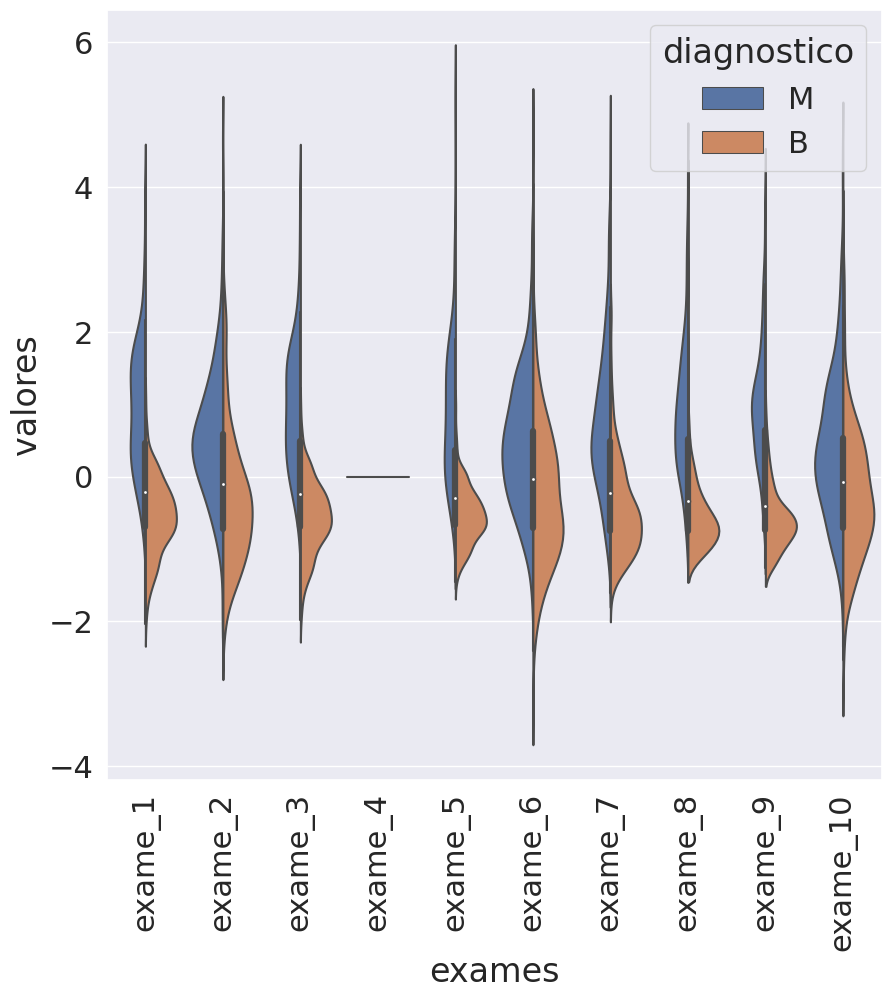

In [23]:
grafico_violino(exames_scaler, 0, 10)

**Exame_4 não plotou gráfico, devido os seus valores serem todos repetidos**

In [24]:
exames.exame_4

0      103.78
1      103.78
2      103.78
3      103.78
4      103.78
        ...  
564    103.78
565    103.78
566    103.78
567    103.78
568    103.78
Name: exame_4, Length: 569, dtype: float64

**Plotar do exame 10 até o exame 21**





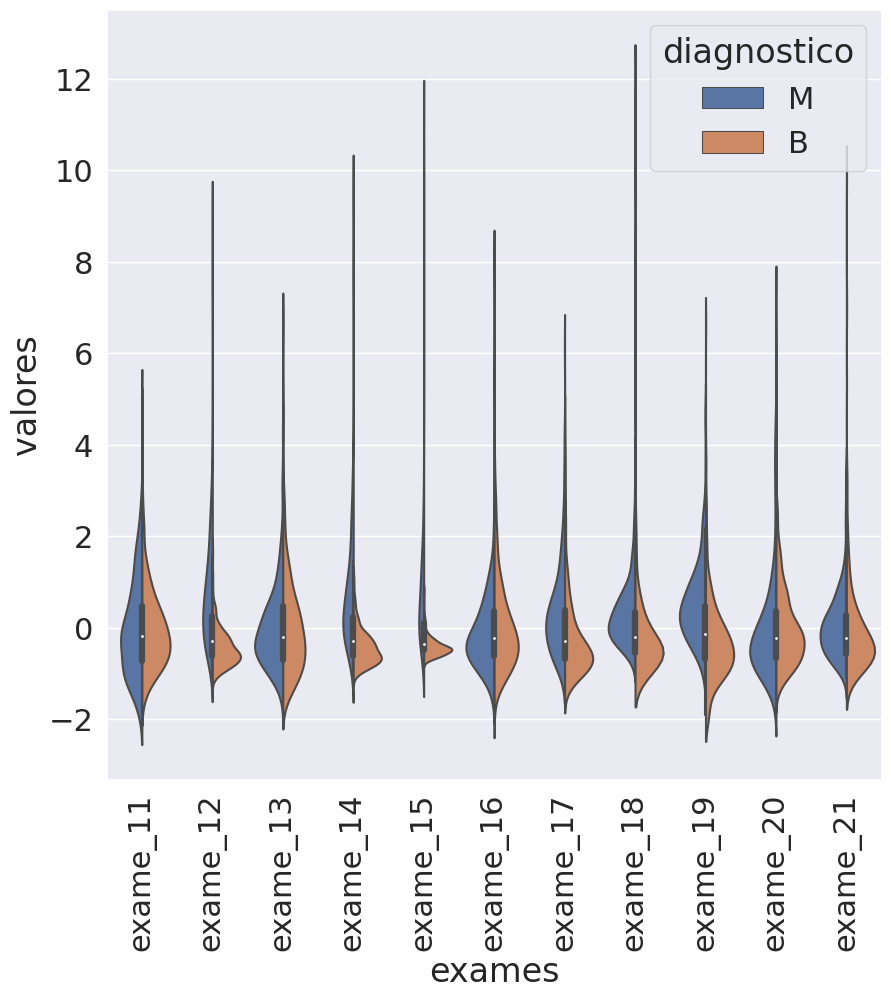

In [25]:
grafico_violino(exames_scaler, 10, 21)

**Plotar do exame 21 até o exame 32**

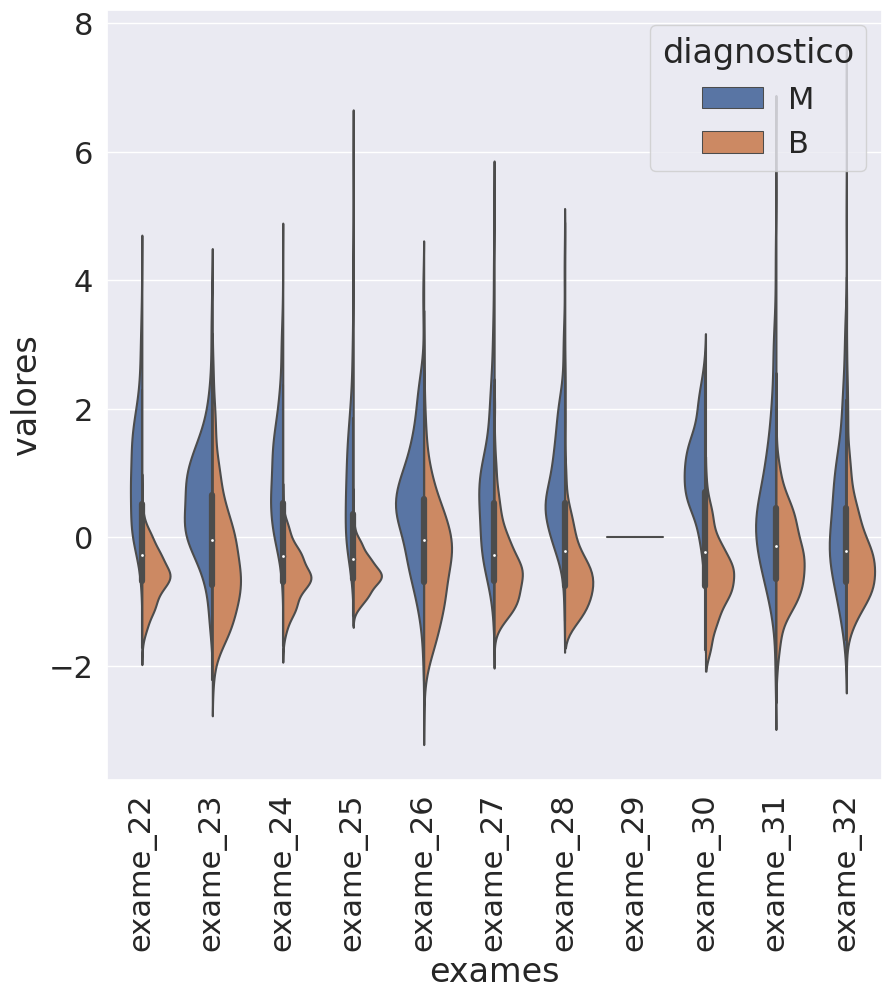

In [26]:
grafico_violino(exames_scaler, 21, 32)

**Exame_29 não plotou gráfico, devido os seus valores serem todos repetidos**

In [27]:
exames.exame_29

0      0.786
1      0.786
2      0.786
3      0.786
4      0.786
       ...  
564    0.786
565    0.786
566    0.786
567    0.786
568    0.786
Name: exame_29, Length: 569, dtype: float64

**Eliminar as variáveis com valores repetidos**

In [28]:
exames_scaler.drop(columns=['exame_4', 'exame_29'],inplace=True)

## <font color=navy>2° Pré-Processamento

> Com a retirada das variáveis ocorreu um pequeno aumento no score

In [29]:
def classificar(valores):
    SEED = 123
    random.seed(SEED)

    treino_x, teste_x, treino_y, teste_y = train_test_split(valores, diagnostico, 
                                                        test_size=0.25)
    
    # Machine Learning
    classificador = RandomForestClassifier(n_estimators = 100)
    classificador.fit(treino_x, treino_y)
    print('Classificação: %.2f%%'%(classificador.score(teste_x, teste_y)*100))

In [30]:
classificar(exames_scaler)

Classificação: 99.30%


# <font color=Orange>**PCA**

**Uma das técnicas que podemos utilizar para manter o máximo de informações possível em dimensionalidades reduzidas.**

> <font color=red>**Obs: Usar 1° StandardScaler para depois usar o PCA**

* É um técnica de modelagem não-supervisionada

* Funciona melhor em conjunto de dados com 3 ou mais dimensões

* As variáveis tem q serem numericas

**Por que reduzir a base de dados?**

* Quanto mais componentes menos coisa conseguem explicar

* Dimensões grandes são difíceis de treinar

* visualização não é possível com dados dimencionais muito grande

* Carregar dados dimensionais muito alto pode ser um problema com espaço de armazenamento limitado na memória





In [31]:
# Quantidade de features no dataset
n_fatores = exames_scaler.shape[1]
n_fatores

30

**Treinar as features**

In [32]:
from sklearn.decomposition import PCA

pca = PCA(n_components = n_fatores)
pca.fit(exames_scaler)

PCA(n_components=30)

**Avalia a resultado da máquina**

In [33]:
import plotly.express as px
import numpy as np

# Definindo um nome para cada um do fatores
fatores = [f'F{i+1}' for i in range(n_fatores)]
fatores

['F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'F6',
 'F7',
 'F8',
 'F9',
 'F10',
 'F11',
 'F12',
 'F13',
 'F14',
 'F15',
 'F16',
 'F17',
 'F18',
 'F19',
 'F20',
 'F21',
 'F22',
 'F23',
 'F24',
 'F25',
 'F26',
 'F27',
 'F28',
 'F29',
 'F30']

**As 2 primeiras Features 61% dos dados. Só precisaremos de 2 features neste caso**

In [34]:
fig = px.bar(x=fatores, y=pca.explained_variance_ratio_, text = np.around(
    pca.explained_variance_ratio_, decimals=2), title= 'Scree Plot')

fig.update_layout(yaxis = {'title': 'Porcentagem de variância explicada',
                           'tickfont': {'size':15}}, xaxis = {'title': 'Fatores', 
                                                              'tickfont':{'size':15}},
                  title = {'font':{'size':25}})

fig.show()

**Refazendo o treino dos dados com o PCA**

In [35]:
pca = PCA(n_components = 2)
exames_pca = pca.fit_transform(exames_scaler)

**Reduzindo mais ainda o número de features (2)**

In [36]:
exames_pca.shape

(569, 2)

## <font color=green>Machine Learning

In [37]:
SEED = 123
random.seed(SEED)

treino_x, teste_x, treino_y, teste_y = train_test_split(exames_pca, diagnostico, 
                                                        test_size=0.25)    

**Baixou um pouco o score (99% p/ 96%), porém reduziu o dataset para 2 features**

In [38]:
classificador3 = RandomForestClassifier(n_estimators = 100, random_state=123)
classificador3.fit(treino_x, treino_y)
print('Score: %.2f%%' %(classificador3.score(teste_x, teste_y)))

Score: 0.97%


**Redução de 93.8% do dataset**

In [39]:
2/32*100
print('Dados existentes na variável exame: %.1f%%' %(2/32*100))

Dados existentes na variável exame: 6.2%


## <font color=gray>**Matriz de Confusão**

**Resumo:**
* **0 = Câncer Benigno:** 89 casos (reais)
* **0 = Predição da máquina:** 94 casos (Câncer Benigno), porém 5 desses casos eram Câncer Maligno, ocorreu um erro de diagnóstico nesses 5 casos.

* **1 = Câncer Maligno:** 54 casos (reais)
* **1 = Predição da máquina:** 49 casos (Câncer Maligno).

[Text(0.5, 40.249999999999986, 'Predição'), Text(77.25, 0.5, 'Real')]

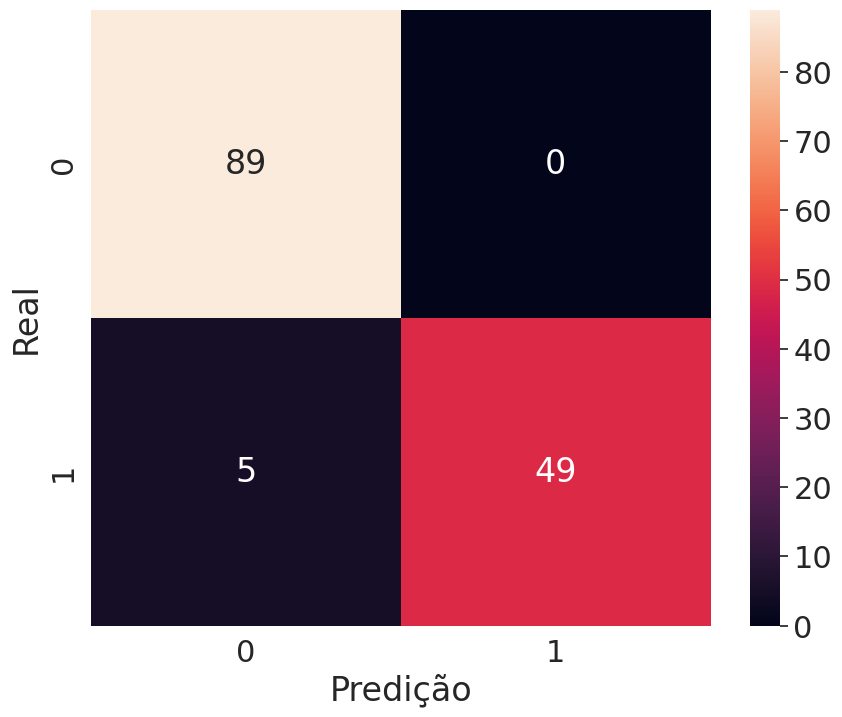

In [40]:
from sklearn.metrics import confusion_matrix

matriz_confusao = confusion_matrix(teste_y, classificador3.predict(teste_x))
matriz_confusao

# Gráfico
plt.figure(figsize = (10, 8))
sns.set(font_scale = 2)
sns.heatmap(matriz_confusao, annot = True, fmt = "d").set(xlabel = "Predição", ylabel = "Real")